### Изучение данных из файла

In [58]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [59]:
#from google.colab import drive
#drive.mount('/content/drive')

# Чтение файла и получение первых 5 строк
data = pd.read_csv("data.csv.zip", sep=',')
#data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data.csv.zip", sep=',')
display(data.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,"[{'rating': ['4', '4', '7', 'NR', '4', '7', 'N...",2900,28387,4,NC,NaN,NaN,NaN,611019,"$418,000"
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"[{'rating': ['4/10', 'None/10', '4/10'], 'data...","1,947 sqft",99216,3 Beds,WA,2.0,NaN,NaN,201916904,"$310,000"
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"[{'rating': ['8/10', '4/10', '8/10'], 'data': ...","3,000 sqft",90049,3 Beds,CA,1.0,NaN,yes,FR19221027,"$2,895,000"
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"[{'rating': ['9/10', '9/10', '10/10', '9/10'],...","6,457 sqft",75205,5 Beds,TX,3.0,NaN,NaN,14191809,"$2,395,000"
4,for sale,NaN,lot/land,1524 Kiscoe St,NaN,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",NaN,Palm Bay,"[{'rating': ['4/10', '5/10', '5/10'], 'data': ...",NaN,32908,NaN,FL,NaN,NaN,NaN,861745,"$5,000"


In [60]:
# Получение информации о столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377185 entries, 0 to 377184
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   status        337267 non-null  object
 1   private pool  4181 non-null    object
 2   propertyType  342452 non-null  object
 3   street        377183 non-null  object
 4   baths         270847 non-null  object
 5   homeFacts     377185 non-null  object
 6   fireplace     103115 non-null  object
 7   city          377151 non-null  object
 8   schools       377185 non-null  object
 9   sqft          336608 non-null  object
 10  zipcode       377185 non-null  object
 11  beds          285903 non-null  object
 12  state         377185 non-null  object
 13  stories       226470 non-null  object
 14  mls-id        24942 non-null   object
 15  PrivatePool   40311 non-null   object
 16  MlsId         310305 non-null  object
 17  target        374704 non-null  object
dtypes: object(18)
memory usa

### Описание датасета

- status - статус продажи
- private pool и PrivatePool - наличие частного бассейна,
- propertyType - тип недвижимости, поместья, свойства,
- street - адрес дома
- baths - количество ванных комнат
- homeFacts - сведения о строении дома, содержит несколько отдельных данных, имеющих влияние на оценку недвижимости, дома, квартиры
- fireplace - сведения о наличии камина (ов) в доме
- city - город
- schools - сведения о школах в районе
- sqft - площадь дома в футах
- zipcode - почтовый индекс
- beds - количество спален в доме
- state - государство/штаты
- stories - этажность недвижимости
- mls-id и MlsId - идентификатор MLS (Multiple Listing Service - Служба множественного листинга)
- target - целевой признак, который необходимо спрогнозировать - цена недвижимости

In [61]:
# Получение описательной статистики
data.describe(include=['object'])

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,schools,sqft,zipcode,beds,state,stories,mls-id,PrivatePool,MlsId,target
count,337267,4181,342452,377183,270847,377185,103115,377151,377185,336608,377185,285903,377185,226470,24942,40311,310305,374704
unique,159,1,1280,337076,229,321009,1653,2026,297365,25405,4549,1184,39,348,24907,2,232944,43939
top,for sale,Yes,single-family home,Address Not Disclosed,2 Baths,"{'atAGlanceFacts': [{'factValue': '', 'factLab...",yes,Houston,"[{'rating': [], 'data': {'Distance': [], 'Grad...",0,32137,3 Beds,FL,1.0,No MLS#,yes,NO MLS,"$225,000"
freq,156104,4181,92206,672,52466,7174,50356,24442,4204,11854,2141,53459,115449,67454,3,28793,24,1462


### Работа с дублирующимися данными

In [62]:
# Находим количество дубликатов в датасете
dupl_columns = list(data.columns)
mask = data.duplicated(subset=dupl_columns)
duplicates = data[mask]
print(f'Число найденных дубликатов: {duplicates.shape[0]}')

Число найденных дубликатов: 50


In [63]:
# Удаление дубликатов
print(f'Результирующее число записей до удаления дубликатов: {data.shape[0]}')
data = data.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей после удаления дубликатов: {data.shape[0]}')

Результирующее число записей до удаления дубликатов: 377185
Результирующее число записей после удаления дубликатов: 377135


### Работа с выбросами

In [64]:
# Смотрим статистику по целевому столбцу target
data['target'].describe()

count       374655
unique       43939
top       $225,000
freq          1462
Name: target, dtype: object

По статистике, указанной выше мы видим что наименьшая стоимость недвижимости 1$, а наибольшее 195000000$. В нашем датасете есть выбросы, которые нужно убрать.

<ipython-input-65-d8ef07356a8b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['target'] = data['target'].str.replace('$', '')
<ipython-input-65-d8ef07356a8b>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['target'] = data['target'].str.replace('+', '')


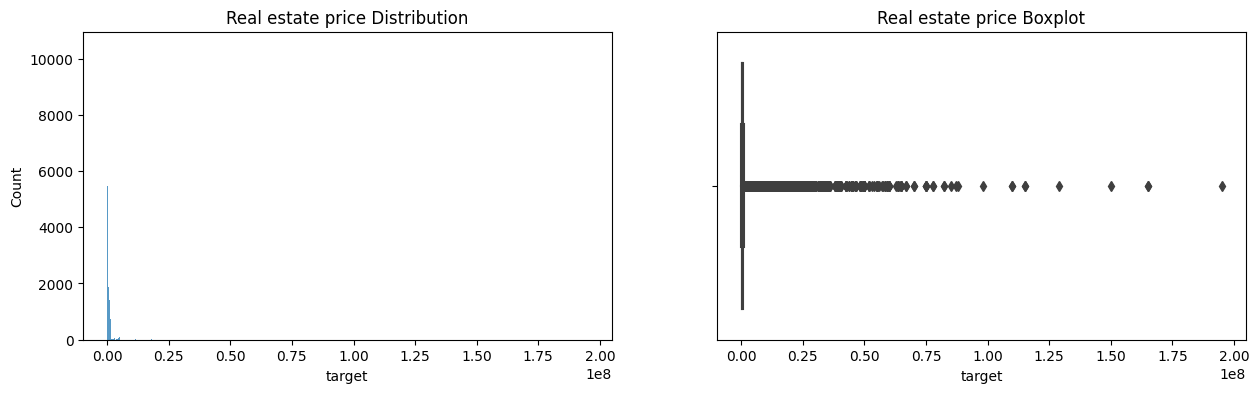

In [65]:
#Удаляем лишние символы
data['target'] = data['target'].str.replace('$', '')
data['target'] = data['target'].str.replace('+', '')
data['target'] = data['target'].str.replace(',', '')
data['target'] = data['target'].str.replace('/mo', '')
data['target'] = data['target'].str.replace('1215 - 1437', 'NaN')
# Меняем тип данных на float64
data['target'] = data['target'].astype('float64')

# Построим гистограмму и коробчатую диаграмму для признака target (цена недвижимости)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=data, x='target', ax=axes[0]);
histplot.set_title('Real estate price Distribution');
boxplot = sns.boxplot(data=data, x='target', ax=axes[1]);
boxplot.set_title('Real estate price Boxplot');

Построенная гистрограмма и коробчатая диаграмма показывает нам наличие выбросов. Будем их убирать.

In [66]:
# Убираем выбросы по методу 3 сигм.
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 3 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(data, 'target', log_scale=True)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

data = cleaned

Число выбросов по методу z-отклонения: 6231
Результирующее число записей: 368423


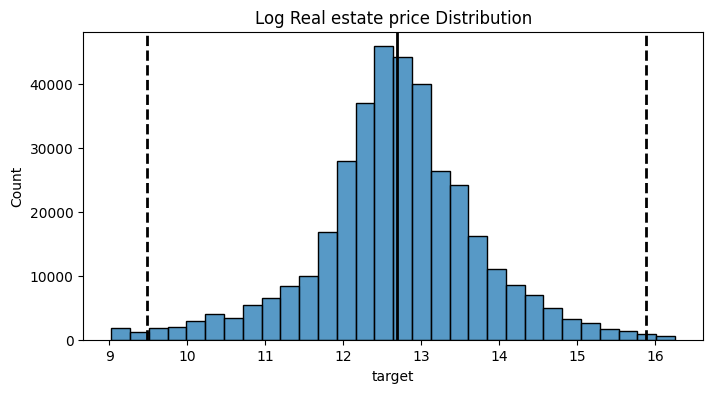

In [67]:
# Проверяем визуально правильно ли отработал метод 3 сигм. Возможно нужно дать некоторые послабления на границы интервалов.
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
target = np.log(data['target'] + 1)
histplot = sns.histplot(target, bins=30, ax=ax)
histplot.axvline(target.mean(), color='k', lw=2)
histplot.axvline(target.mean()+ 3 * target.std(), color='k', ls='--', lw=2)
histplot.axvline(target.mean()- 3 * target.std(), color='k', ls='--', lw=2)
histplot.set_title('Log Real estate price Distribution');


### Проектирование признаков

In [68]:
#Распаковываем признаки
def schools(Facts, n):
    Facts = Facts[1 : -1]
    Facts = eval(Facts)
    #print(Facts)
    return Facts[n]

#Распаковываем schools_rating
data['schools_rating'] = data['schools'].apply(lambda x: schools(x, "rating"))
#Распаковываем schools_data
data['schools_data'] = data['schools'].apply(lambda x: schools(x, "data"))


#Распаковываем признаки
def data_schools(Facts, n):
    Facts = dict(Facts)
    return Facts[n]

#Распаковываем schools_distance
data['schools_distance'] = data['schools_data'].apply(lambda x: data_schools(x, "Distance"))

#Удаляем признаки
data = data.drop('schools_data', axis=1)
data = data.drop('schools', axis=1)

#display(data)

In [69]:
def schools_parsing(Facts, n):
    Facts = list(Facts)
    #print(Facts)
    try:
        return Facts[n]
    except IndexError as e:
        #return np.nan
        return np.nan


for i in range(0, 2):
    column = 'sh_r' + str(i)
    data[column] = data['schools_rating'].apply(lambda x: schools_parsing(x, i))

for i in range(0, 3):
    column = 'sh_d' + str(i)
    data[column] = data['schools_distance'].apply(lambda x: schools_parsing(x, i))

#Удаляем признак schools_rating
data = data.drop('schools_rating', axis=1)
data = data.drop('schools_distance', axis=1)

display(data)

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,sqft,zipcode,...,stories,mls-id,PrivatePool,MlsId,target,sh_r0,sh_r1,sh_d0,sh_d1,sh_d2
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,2900,28387,...,NaN,NaN,NaN,611019,418000.0,4,4,2.7 mi,3.6 mi,5.1 mi
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"1,947 sqft",99216,...,2.0,NaN,NaN,201916904,310000.0,4/10,None/10,1.65mi,1.32mi,1.01mi
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"3,000 sqft",90049,...,1.0,NaN,yes,FR19221027,2895000.0,8/10,4/10,1.19mi,2.06mi,2.63mi
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"6,457 sqft",75205,...,3.0,NaN,NaN,14191809,2395000.0,9/10,9/10,1.05mi,0.1mi,1.05mi
5,for sale,NaN,townhouse,1624 S Newkirk St,NaN,"{'atAGlanceFacts': [{'factValue': '1920', 'fac...",NaN,Philadelphia,897 sqft,19145,...,2.0,NaN,NaN,PAPH847006,209000.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377180,NaN,NaN,Single Family,20800 NE 23rd Ave,6.0,"{'atAGlanceFacts': [{'factValue': '1990', 'fac...",NaN,Miami,"4,017",33180,...,0.0,NaN,Yes,A10702700,1249000.0,10/10,5/10,32.1 mi,1.1 mi,NaN
377181,for sale,NaN,condo,3530 N Lake Shore Dr #4B,3 Baths,"{'atAGlanceFacts': [{'factValue': '1924', 'fac...",NaN,Chicago,"2,000 sqft",60657,...,9.0,NaN,NaN,10374233,674999.0,1/10,5/10,10.61mi,1.42mi,0.4mi
377182,for sale,NaN,single-family home,15509 Linden Blvd,3 Baths,"{'atAGlanceFacts': [{'factValue': '1950', 'fac...",NaN,Jamaica,"1,152 sqft",11434,...,2,NaN,NaN,NaN,528000.0,5/10,4/10,0.48mi,0.73mi,NaN
377183,NaN,NaN,NaN,7810 Pereida St,NaN,"{'atAGlanceFacts': [{'factValue': None, 'factL...",NaN,Houston,NaN,77028,...,NaN,NaN,NaN,NaN,34500.0,NA,NA,1.3 mi,0.5 mi,1.9 mi


### Очистка данных и преобразование к цифровому формату.

In [70]:

data['sh_r0'] = data['sh_r0'].str.replace('/10', '')
data['sh_r0'] = data['sh_r0'].str.replace('None', 'NaN')
data['sh_r0'] = data['sh_r0'].str.replace('NR', 'NaN')
data['sh_r0'] = data['sh_r0'].str.replace('NA', 'NaN')
data['sh_r0'] = data['sh_r0'].str.replace("^$", 'NaN', regex=True)
data['sh_r0'] = data['sh_r0'].astype('float64')

data['sh_r1'] = data['sh_r1'].str.replace('/10', '')
data['sh_r1'] = data['sh_r1'].str.replace('None', 'NaN')
data['sh_r1'] = data['sh_r1'].str.replace('NR', 'NaN')
data['sh_r1'] = data['sh_r1'].str.replace('NA', 'NaN')
data['sh_r1'] = data['sh_r1'].str.replace("^$", 'NaN', regex=True)
data['sh_r1'] = data['sh_r1'].astype('float64')
"""
data['sqft'] = data['sqft'].str.replace(' sqft', '')
data['sqft'] = data['sqft'].str.replace('Total interior livable area: ', '')
data['sqft'] = data['sqft'].str.replace(',', '')
data['sqft'] = data['sqft'].str.replace('--', 'NaN')
data['sqft'] = data['sqft'].astype('float64')

data['zipcode'] = data['zipcode'].str.replace('.*[0-9]-[0-9].*', 'NaN', regex=True)
data['zipcode'] = data['zipcode'].str.replace('--', 'NaN')
data['zipcode'] = data['zipcode'].astype('float64')

data['sh_d0'] = data['sh_d0'].str.replace('mi', '')
data['sh_d0'] = data['sh_d0'].astype('float64')

data['sh_d1'] = data['sh_d1'].str.replace('mi', '')
data['sh_d1'] = data['sh_d1'].astype('float64')

data['sh_d2'] = data['sh_d2'].str.replace('mi', '')
data['sh_d2'] = data['sh_d2'].astype('float64')

data['beds'] = data['beds'].str.replace(".*[^0-9].*", 'NaN', regex=True)
data['beds'] = data['beds'].astype('float64')

data['propertyType'] = data['propertyType'].str.replace('single-family home', 'Single Family Home')
data['propertyType'] = data['propertyType'].str.replace('Single Family', 'Single Family Home')
data['propertyType'] = data['propertyType'].str.replace('Single Family Home Home Home', 'Single Family Home')
data['propertyType'] = data['propertyType'].str.replace('mobile', 'manufactured home (house)')
data['propertyType'] = data['propertyType'].str.replace('prefab', 'manufactured home (house)')
data['propertyType'] = data['propertyType'].str.replace('modular', 'manufactured home (house)')
data['propertyType'] = data['propertyType'].str.replace('mo2 le', 'mobile')
data['propertyType'] = data['propertyType'].str.replace('mo2le', 'mobile')
data['propertyType'] = data['propertyType'].str.replace('ca2 n', 'cabin')
data['propertyType'] = data['propertyType'].str.replace('ca2n', 'cabin')
data['propertyType'] = data['propertyType'].str.replace('mid century', 'midcentury')
data['propertyType'] = data['propertyType'].str.replace('mid-century', 'midcentury')
"""

'\ndata[\'sqft\'] = data[\'sqft\'].str.replace(\' sqft\', \'\')\ndata[\'sqft\'] = data[\'sqft\'].str.replace(\'Total interior livable area: \', \'\')\ndata[\'sqft\'] = data[\'sqft\'].str.replace(\',\', \'\')\ndata[\'sqft\'] = data[\'sqft\'].str.replace(\'--\', \'NaN\')\ndata[\'sqft\'] = data[\'sqft\'].astype(\'float64\')\n\ndata[\'zipcode\'] = data[\'zipcode\'].str.replace(\'.*[0-9]-[0-9].*\', \'NaN\', regex=True)\ndata[\'zipcode\'] = data[\'zipcode\'].str.replace(\'--\', \'NaN\')\ndata[\'zipcode\'] = data[\'zipcode\'].astype(\'float64\')\n\ndata[\'sh_d0\'] = data[\'sh_d0\'].str.replace(\'mi\', \'\')\ndata[\'sh_d0\'] = data[\'sh_d0\'].astype(\'float64\')\n\ndata[\'sh_d1\'] = data[\'sh_d1\'].str.replace(\'mi\', \'\')\ndata[\'sh_d1\'] = data[\'sh_d1\'].astype(\'float64\')\n\ndata[\'sh_d2\'] = data[\'sh_d2\'].str.replace(\'mi\', \'\')\ndata[\'sh_d2\'] = data[\'sh_d2\'].astype(\'float64\')\n\ndata[\'beds\'] = data[\'beds\'].str.replace(".*[^0-9].*", \'NaN\', regex=True)\ndata[\'beds\'] = d

### Кодирование категориальных признаков

In [71]:
!pip install category_encoders

import category_encoders as ce # импорт для работы с кодировщиком
"""
bin_encoder = ce.BinaryEncoder(cols=['status']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['status'])
data = pd.concat([data, type_bin], axis=1)

bin_encoder = ce.BinaryEncoder(cols=['propertyType']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['propertyType'])
data = pd.concat([data, type_bin], axis=1)

bin_encoder = ce.BinaryEncoder(cols=['city']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['city'])
data = pd.concat([data, type_bin], axis=1)

bin_encoder = ce.BinaryEncoder(cols=['fireplace']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['fireplace'])
data = pd.concat([data, type_bin], axis=1)
"""
bin_encoder = ce.BinaryEncoder(cols=['state']) # указываем столбец для кодирования
type_bin = bin_encoder.fit_transform(data['state'])
data = pd.concat([data, type_bin], axis=1)

data

,status,private pool,propertyType,street,baths,homeFacts,fireplace,city,sqft,zipcode,...,sh_r1,sh_d0,sh_d1,sh_d2,state_0,state_1,state_2,state_3,state_4,state_5
0,Active,NaN,Single Family Home,240 Heather Ln,3.5,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",Gas Logs,Southern Pines,2900,28387,...,4.0,2.7 mi,3.6 mi,5.1 mi,0,0,0,0,0,1
1,for sale,NaN,single-family home,12911 E Heroy Ave,3 Baths,"{'atAGlanceFacts': [{'factValue': '2019', 'fac...",NaN,Spokane Valley,"1,947 sqft",99216,...,NaN,1.65mi,1.32mi,1.01mi,0,0,0,0,1,0
2,for sale,NaN,single-family home,2005 Westridge Rd,2 Baths,"{'atAGlanceFacts': [{'factValue': '1961', 'fac...",yes,Los Angeles,"3,000 sqft",90049,...,4.0,1.19mi,2.06mi,2.63mi,0,0,0,0,1,1
3,for sale,NaN,single-family home,4311 Livingston Ave,8 Baths,"{'atAGlanceFacts': [{'factValue': '2006', 'fac...",yes,Dallas,"6,457 sqft",75205,...,9.0,1.05mi,0.1mi,1.05mi,0,0,0,1,0,0
5,for sale,NaN,townhouse,1624 S Newkirk St,NaN,"{'atAGlanceFacts': [{'factValue': '1920', 'fac...",NaN,Philadelphia,897 sqft,19145,...,NaN,NaN,NaN,NaN,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377180,NaN,NaN,Single Family,20800 NE 23rd Ave,6.0,"{'atAGlanceFacts': [{'factValue': '1990', 'fac...",NaN,Miami,"4,017",33180,...,5.0,32.1 mi,1.1 mi,NaN,0,0,0,1,1,0
377181,for sale,NaN,condo,3530 N Lake Shore Dr #4B,3 Baths,"{'atAGlanceFacts': [{'factValue': '1924', 'fac...",NaN,Chicago,"2,000 sqft",60657,...,5.0,10.61mi,1.42mi,0.4mi,0,0,1,1,1,1
377182,for sale,NaN,single-family home,15509 Linden Blvd,3 Baths,"{'atAGlanceFacts': [{'factValue': '1950', 'fac...",NaN,Jamaica,"1,152 sqft",11434,...,4.0,0.48mi,0.73mi,NaN,0,0,1,0,0,1
377183,NaN,NaN,NaN,7810 Pereida St,NaN,"{'atAGlanceFacts': [{'factValue': None, 'factL...",NaN,Houston,NaN,77028,...,NaN,1.3 mi,0.5 mi,1.9 mi,0,0,0,1,0,0


### Работа с пропусками

In [72]:
# Смотрим количество пропусков в датасете.
display(data.isna().sum())

status           38972
private pool    364285
propertyType     33652
street               2
baths           101540
homeFacts            0
fireplace       266761
city                29
sqft             37698
zipcode              0
beds             87384
state                0
stories         145037
mls-id          343573
PrivatePool     328907
MlsId            63144
target               0
sh_r0            13316
sh_r1            25860
sh_d0             4152
sh_d1            12558
sh_d2            47365
state_0              0
state_1              0
state_2              0
state_3              0
state_4              0
state_5              0
dtype: int64

In [73]:
#задаем минимальный порог: вычисляем 70% от числа строк
thresh = data.shape[0]*0.7
#удаляем столбцы, в которых более 30% (100-70) пропусков
#data = data.dropna(how='any', thresh=thresh, axis=1)
data = data.dropna(thresh=thresh, axis=1)
#удаляем записи, в которых есть хотя бы 1 пропуск
data = data.dropna(how='any', axis=0)
#отображаем результирующую долю пропусков
data.isnull().mean()

status          0.0
propertyType    0.0
street          0.0
baths           0.0
homeFacts       0.0
city            0.0
sqft            0.0
zipcode         0.0
beds            0.0
state           0.0
MlsId           0.0
target          0.0
sh_r0           0.0
sh_r1           0.0
sh_d0           0.0
sh_d1           0.0
sh_d2           0.0
state_0         0.0
state_1         0.0
state_2         0.0
state_3         0.0
state_4         0.0
state_5         0.0
dtype: float64

In [74]:
# Удаляем все признаки object
data = data.select_dtypes(exclude=['object'])
display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143073 entries, 0 to 377181
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   target   143073 non-null  float64
 1   sh_r0    143073 non-null  float64
 2   sh_r1    143073 non-null  float64
 3   state_0  143073 non-null  int64  
 4   state_1  143073 non-null  int64  
 5   state_2  143073 non-null  int64  
 6   state_3  143073 non-null  int64  
 7   state_4  143073 non-null  int64  
 8   state_5  143073 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 10.9 MB


None

#### Отбор признаков

state_0    0.004110
state_2    0.054902
state_4    0.060950
state_1    0.079995
state_5    0.120469
state_3    0.149760
sh_r1      0.183501
sh_r0      0.212687
Name: target, dtype: float64


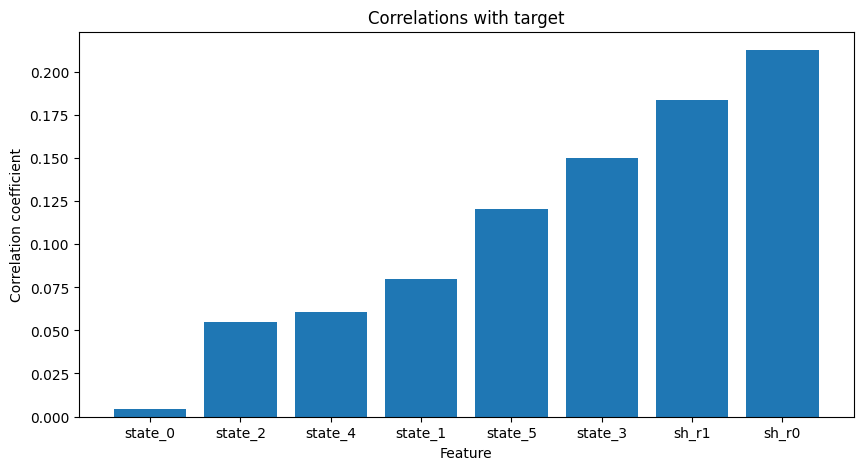

In [75]:
#Вычисляем модуль корреляции
corr_with_target = data.corr()['target'].abs().sort_values()
#Удаляем корреляцию целевой переменной с самой собой
corr_with_target = corr_with_target.drop('target')
print(corr_with_target)
#Строим столбчатую диаграмму корреляций
fig, ax = plt.subplots(figsize=(10, 5)) #фигура+координатная плоскость
ax.bar(corr_with_target.index, corr_with_target.values) #столбчатая диаграмма
ax.set_title('Correlations with target') #название графика
ax.set_xlabel('Feature') #название оси x
ax.set_ylabel('Сorrelation coefficient'); #название оси y

## Модели для предсказания стоимости домов на основе истории предложений.

In [76]:
from sklearn.model_selection import train_test_split

# Составляем матрицу наблюдений X и вектор ответов y
X = data.drop(['target'],axis = 1)
Y = data['target']

# Создаём тестовый набор и набор для обучения
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 42)
features = data.drop('target', axis=1).columns

#### Аналитическое решение с помощью метода линейной регресии.

In [77]:
#from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import pickle

# Обучаем модель
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train, y_train)
#print(np.round(lr_model.intercept_, 2))

# Делаем предсказания
y_train_predict = lr_model.predict(X_train)
y_test_predict = lr_model.predict(X_test)

# Производим сериализацию и записываем результат в файл формата pkl
with open('lr_model.pkl', 'wb') as output:
    pickle.dump(lr_model, output)

In [78]:
#import sklearn.metrics as metrics
from sklearn import metrics

# Смотрим значения метрик на тренировочной и тестовой выборках
def print_metrics(y_train, y_train_predict, y_test, y_test_predict):
  print('Train R^2: {:.3f}'.format(metrics.r2_score(y_train, y_train_predict)))
  print('Train MAE: {:.0f}'.format(metrics.mean_absolute_error(y_train, y_train_predict)))
  print('Train MAPE:{:.0f}'.format(metrics.mean_absolute_percentage_error(y_train,y_train_predict)*100))
  print('\n')
  print('Test R^2: {:.3f}'.format(metrics.r2_score(y_test, y_test_predict)))
  print('Test MAE: {:.0f}'.format(metrics.mean_absolute_error(y_test, y_test_predict)))
  print('Test MAPE: {:.0f}'.format(metrics.mean_absolute_percentage_error(y_test, y_test_predict)*100))

print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.097
Train MAE: 442518
Train MAPE:124


Test R^2: 0.093
Test MAE: 437990
Test MAPE: 124


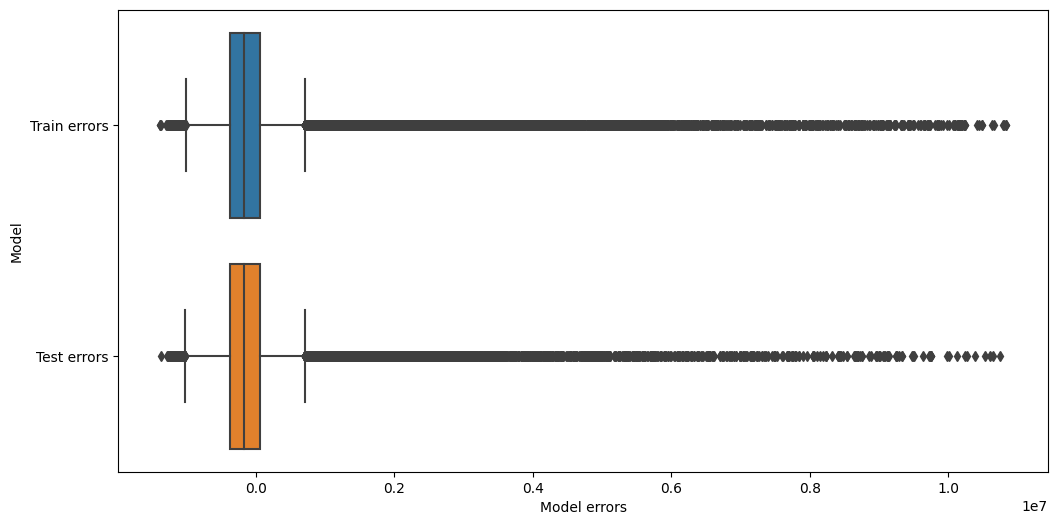

In [79]:
#Визуализируем ошибки
fig, ax = plt.subplots(figsize=(12, 6)) #фигура + координатная плоскость
#Ошибки модели на тренировочной выборке
y_train_errors = y_train - lr_model.predict(X_train)
#Ошибки модели на тестовой выборке
y_test_errors = y_test - lr_model.predict(X_test)
#Для удобства визуализации составим DataFrame из ошибок
predict_df = pd.DataFrame(
{'Train errors': y_train_errors,
'Test errors': y_test_errors
}
)
#Строим boxplot для ошибок
sns.boxplot(data=predict_df, orient='h', ax=ax)
ax.set_xlabel('Model errors') #название оси абсцисс
ax.set_ylabel('Model'); #название оси ординат

In [80]:
from sklearn import preprocessing

# Нормализация тренировочной и тестовой выборок
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
poly = preprocessing.PolynomialFeatures(degree=2, include_bias=False)
poly.fit(X_train_scaled)
X_train_scaled_poly = poly.transform(X_train_scaled)
X_test_scaled_poly = poly.transform(X_test_scaled)
print(X_train_scaled_poly.shape)

(100151, 44)


In [81]:
# Обучение линейной регресии на полиномиальных признаках
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_scaled_poly, y_train)
y_train_predict = lr_poly.predict(X_train_scaled_poly)
y_test_predict = lr_poly.predict(X_test_scaled_poly)
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.152
Train MAE: 418370
Train MAPE:111


Test R^2: 0.145
Test MAE: 414002
Test MAPE: 111


In [82]:
print(lr_poly.coef_)

[-9.92553689e+04 -1.12887655e+05 -2.36969330e+16  1.20071363e+17
 -8.23578457e+16 -1.67797165e+17  7.61493902e+17 -1.77911740e+18
  1.43400679e+06 -9.82852660e+05 -1.64202646e+06 -3.83076487e+05
  1.79325739e+05 -5.79091594e+05  1.63507124e+05 -1.03165341e+05
  9.73789052e+05 -4.92839916e+05 -1.75307544e+05  2.16267835e+05
 -3.33724578e+04 -5.24693869e+04  3.19437510e+04  2.36969330e+16
  1.01070232e+15  1.70517734e+15  8.09132752e+14 -8.54170504e+14
 -1.02453292e+05 -1.20071363e+17 -2.72008431e+05  3.73284446e+05
 -4.74945671e+05 -2.70911645e+04  8.23578457e+16 -3.90950505e+04
 -4.51948973e+05  1.27106374e+05  1.67797165e+17  6.77836991e+03
 -5.16462565e+05 -7.61493902e+17  5.31416074e+05  1.77911740e+18]


In [83]:
# Строим линейную регрессию с L1-регуляризацией
lasso_lr_poly = linear_model.Lasso()
lasso_lr_poly.fit(X_train_scaled_poly, y_train)
y_train_predict = lasso_lr_poly.predict(X_train_scaled_poly)
y_test_predict = lasso_lr_poly.predict(X_test_scaled_poly)
print_metrics(y_train, y_train_predict, y_test, y_test_predict)
print(lasso_lr_poly.coef_)

Train R^2: 0.152
Train MAE: 418425
Train MAPE:111


Test R^2: 0.145
Test MAE: 414032
Test MAPE: 111
[  -99041.94902273  -114553.83441211    47223.05273425   173851.15382481
   404795.59633703   -87376.81017114   -27519.10282727   118084.12070968
  1435158.29358728  -982359.92447552 -1117551.70311354  -374260.54022881
   173118.47336395  -573730.47523895   157180.12085785  -103309.54637478
   972577.98371339       -0.          -183620.05385538   218514.82688847
   -33130.18700153   -50509.39930392    34096.94264201   229670.36134176
        0.                0.                0.                0.
  -145682.82713982    82123.94749768  -271449.81721573   375666.8619585
  -476503.81454115   -24273.86398988  -250460.77105994   -42848.13714863
  -448295.42340728   126875.07470056   221630.91373915     3316.59000056
  -520305.24348009   101641.70641356   528041.31283664  -142659.90412871]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.028e+16, tolerance: 8.473e+12
  model = cd_fast.enet_coordinate_descent(


In [84]:
# Строим линейную регрессию с L2-регуляризацией
ridge_lr_poly = linear_model.Ridge()
ridge_lr_poly.fit(X_train_scaled_poly, y_train)
y_train_predict = ridge_lr_poly.predict(X_train_scaled_poly)
y_test_predict = ridge_lr_poly.predict(X_test_scaled_poly)
print_metrics(y_train, y_train_predict, y_test, y_test_predict)

Train R^2: 0.152
Train MAE: 418423
Train MAPE:111


Test R^2: 0.145
Test MAE: 414017
Test MAPE: 111


#### Стекинг

In [85]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

#Создаем список кортежей вида: (наименование модели, модель)
estimators = [
    ('lr', RidgeCV()),
    ('dt',  DecisionTreeRegressor(random_state=42))
]

# Создаем объект класса стекинг
reg = StackingRegressor(
    estimators=estimators, #базовые модели в стекинге
    final_estimator=RandomForestRegressor( #метамодель
        n_estimators=10, #количество деревьев в ансамбле
        random_state=42 #датчик генератора случайных чисел
    )
)

# Обучаем модель
reg.fit(X_train, y_train)

# Формируем предсказание для тестовой выборки
y_pred_stack = reg.predict(X_test)
# Оцениваем качество по метрике MSE
print(f'Качество предсказания по MSE для стекинга {round(mean_squared_error(y_test, y_pred_stack), 2)}')

Качество предсказания по MSE для стекинга 626077615644.63


In [86]:
# Получаем мета-признаки из тренировочных данных
meta_data = reg.transform(X_train)
# Создаем DataFrame
meta_df = pd.DataFrame(
    meta_data, #содержимое таблицы
    columns=['meta_feature1', 'meta_feature2',] #название столбцов
)
meta_df.head()

,meta_feature1,meta_feature2
0,8.053177e+05,6.760274e+05
1,6.051532e+05,6.087722e+05
2,9.962524e+05,5.467721e+05
3,1.169744e+06,1.295448e+06
4,5.270799e+05,1.958154e+05


In [87]:
from sklearn import model_selection
from sklearn import tree

#Создаём модель
model = tree.DecisionTreeRegressor(
    max_depth=1, #глубина
    criterion='squared_error', #критерий информативности
    random_state=42 #генератор случайных чисел
)

#Создаём объект кросс-валидатора KFold
kf = model_selection.KFold(n_splits=5)

#Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model, #модель
    X=X, #матрица наблюдений X
    y=Y, #вектор ответов y
    cv=kf, #кросс-валидатор
    scoring='accuracy', #метрика
    return_train_score=True #подсчёт метрики на тренировочных фолдах
)
display(cv_metrics)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 282, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py", line 192, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py", line 221, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
 

{'fit_time': array([0.11207104, 0.09969473, 0.10197711, 0.09666324, 0.10307503]),
 'score_time': array([0.04249501, 0.01548004, 0.00788164, 0.01703858, 0.00844812]),
 'test_score': array([nan, nan, nan, nan, nan]),
 'train_score': array([nan, nan, nan, nan, nan])}